<a href="https://colab.research.google.com/github/reinaqu/reportingslr/blob/master/Smart_Contract_Language_a_multivocal_mapping_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Smart Contract Languages: A Multivocal Mapping Study**


---





1.Configure the the environment by cloning the github report with the libraries. Now the github repository is public, but we could changed it to private.



In [4]:
#from getpass import getpass
import os

#os.environ['USER'] = input('Enter the username of your Github account: ')
#os.environ['PASSWORD'] = getpass('Enter the password of your Github account: ')
#os.environ['REPOSITORY'] = input('Enter the name of the Github repository: ')
#os.environ['GITHUB_AUTH'] = os.environ['USER'] + ':' + os.environ['PASSWORD']
#!rm -rf $REPOSITORY # To remove the previous clone of the Github repository
#!git clone https://$GITHUB_AUTH@github.com/$USER/$REPOSITORY.git
#os.environ['USER'] = os.environ['PASSWORD'] = os.environ['REPOSITORY'] = os.environ['GITHUB_AUTH'] = ""
#from google.colab import drive
#drive.mount('/content/drive/')
#%cd /content/drive/

os.environ['REPOSITORY'] ='reportingslr'
os.environ['USER'] = 'reinaqu'
!dir $REPOSITORY
!rm -rf $REPOSITORY # To remove the previous clone of the Github repository
#! git clone https://github.com/reinaqu/reportingslr.git
!git clone https://github.com/$USER/$REPOSITORY.git
!pip install --upgrade geopandas
import sys
sys.path.append('reportingslr')
sys.path.append('reportingslr/reportingslr/src/')
sys.path.append('reportingslr/reportingslr/data/')
from csvbib_utils import *
from graphics_utils import *
from dataframes import *
from dataframes_sc import *


README.md  reportingslr
Cloning into 'reportingslr'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (230/230), done.
remote: Total 235 (delta 105), reused 130 (delta 3), pack-reused 0
Receiving objects: 100% (235/235), 8.30 MiB | 18.86 MiB/s, done.
Resolving deltas: 100% (105/105), done.
Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.8.1)


2. Load the data files and generate the masters datraframes.

In [19]:
MAP_FILE='reportingslr/reportingslr/data/countries.geojson'
CITATION_FILE='reportingslr/reportingslr/data/citations_per_paper.v.2.0.0.xlsx'
REPORT_FILE="reportingslr/reportingslr/data/report.0.1.0.xlsx"

studies=load_report_csv("reportingslr/reportingslr/data/report.0.1.0.csv",ID_PAPER,enc='cp1252')
languages = studies_by_language(studies)

# create master dataframes
df_qa= create_dataframe_from_excel(REPORT_FILE,'Quality', ID_PAPER) 
df_pp= create_dataframe_from_excel(CITATION_FILE, 'From publish or perish - Rebuta', ID_PAPER)
df_am= create_dataframe_from_excel(CITATION_FILE, 'Altimetrics from PlumX',ID_PAPER)
df_rp= create_dataframe_from_excel(REPORT_FILE,'report.0.1.0', ID_PAPER)
df_uc= create_dataframe_from_excel(REPORT_FILE,'Use cases', ID_PAPER)
df_lang_feat= create_dataframe_from_excel(REPORT_FILE,'Language-features', 'Language')

3. Report the number of studies classified by type of literature (white or grey) and create a pie chart with these data.





                  number of studies
Grey literature                  39
White literature                 70


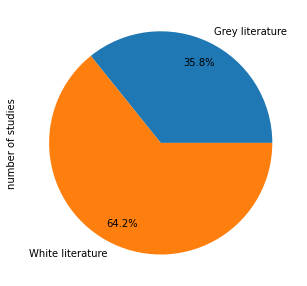

In [6]:
df= create_dataframe_studies_by_literature_type(studies)
print(df)
create_piechart(df,'number of studies')

4. Report the number of studies classified by type of reference and create a pie chart with these data.


                  number of studies
Conference paper                 44
Website                          18
White paper                       9
Workshop paper                    8
Arxiv                             6
Journal paper                     5
Report                            4
Blog                              4
Github                            3
Book chapter                      3
Master thesis                     2
Demo paper                        2
Wiki page                         1


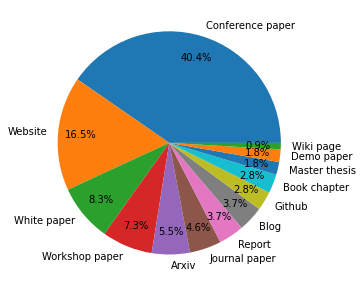

In [8]:
df=create_dataframe_studies_by_type(studies)
print(df)
create_piechart(df, 'number of studies',y_axis_label=False)



5. Report the number of papers of white literature classified by type of reference and create a pie chart with these data.

                  number of studies
Conference paper                 44
Workshop paper                    8
Arxiv                             6
Journal paper                     5
Book chapter                      3
Master thesis                     2
Demo paper                        2


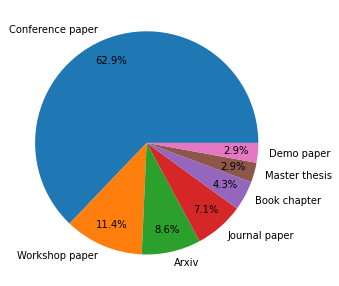

In [9]:
df=create_dataframe_studies_by_type(studies,lambda s:is_white_literature(s))
print(df)
create_piechart(df, 'number of studies',y_axis_label=False)

6. Report the number of studies of grey literature classified by type of reference and create a pie chart with these data.

             number of studies
Website                     18
White paper                  9
Report                       4
Blog                         4
Github                       3
Wiki page                    1


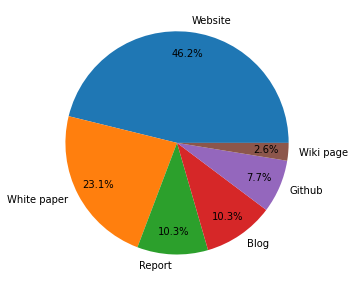

In [10]:
df=create_dataframe_studies_by_type(studies,lambda s:is_grey_literature(s))
print(df)
create_piechart(df, 'number of studies', y_axis_label=False)

7. Report the studies quality.

  IntrinsicIQ ContextualIQ  number of studies
0        High         High                 19
1         Low         High                  6
2      Medium         High                 84


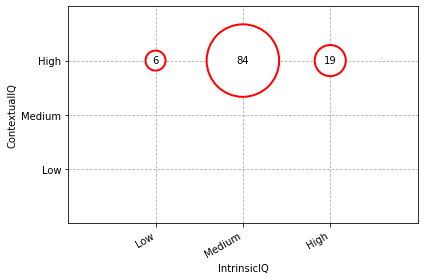

In [12]:
df_contextualIQ=create_dataframe_studies_contextualIQ(studies)
df_facets=create_dataframe_quality_facets(df_contextualIQ, df_qa)
df_fa=create_dataframe_facets_count(df_facets)  
print(df_fa)
rows=['Low', 'Medium','High']
create_bubble(df_fa, rows, rows,'number of studies', 'IntrinsicIQ' , 'ContextualIQ')

8. Report the number of studies by year, classified by type of literature.

   year  white literature  grey literature  total
0  2002                 0                1      1
1  2013                 1                0      1
2  2015                 2                0      2
3  2016                 4                1      5
4  2017                 7               10     17
5  2018                26               18     44
6  2019                25                7     32
7  2020                 5                2      7


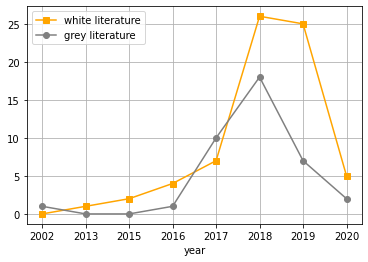

In [11]:
df = create_dataframe_studies_by_year(studies)
print(df)
col_names=['white literature','grey literature']
colours =['orange','grey']
markers =[MARKER_SQUARE,MARKER_CIRCLE]
create_line_plot_multiple_colums(df,'year', col_names, colours ,markers)

9. Report the number of studies by country

                   countries  number of studies
0                  Singapore                  5
1   United States of America                 31
2                     Canada                  2
3                      Italy                 11
4                Switzerland                 10
5                    Germany                  6
6             United Kingdom                  8
7                New Zealand                  2
8                     France                  4
9                 Luxembourg                  2
10             Liechtenstein                  1
11               South Korea                  2
12                   Estonia                  1
13                    Sweden                  2
14                   Denmark                  2
15                     China                  8
16                   Austria                  2
17               Netherlands                  1
18                    Israel                  1
19                     Japan            

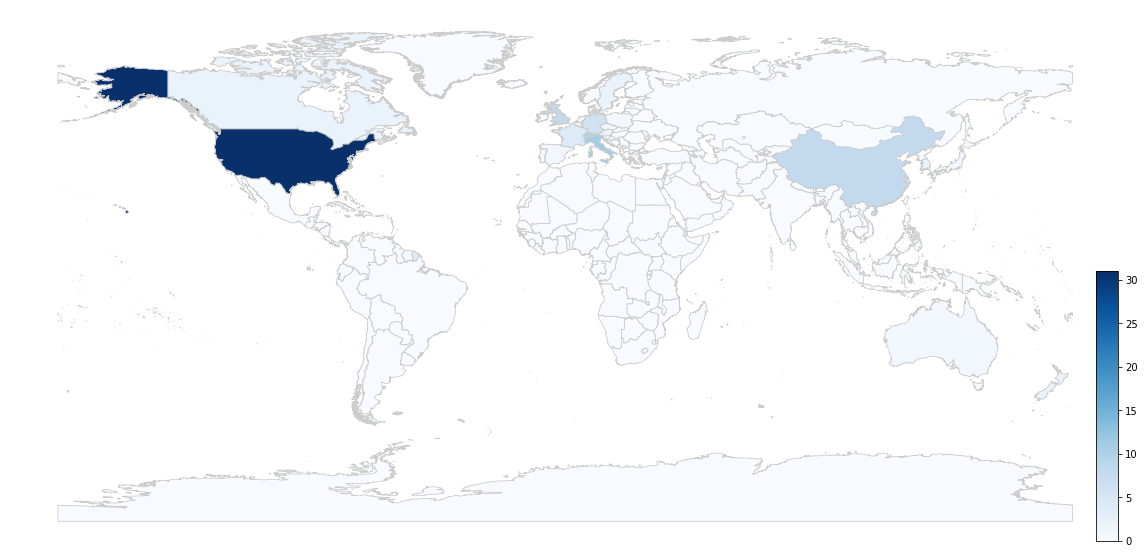

In [15]:
df= create_dataframe_studies_by_country(studies)
print(df)
create_choropleth_map(df,'number of studies', MAP_FILE)

10. Report the number of implementation languages per paradigm.

OrderedDict([('010', 25), ('011', 9), ('001', 28), ('100', 3)])


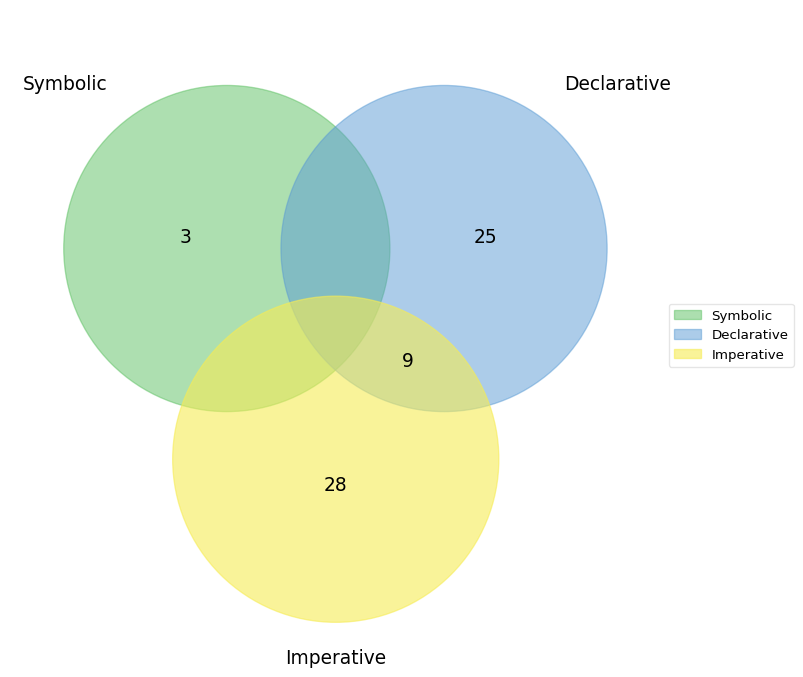

In [20]:
labels = create_labels_names_languages_by_paradigm(languages, lambda s:language_kind(s)=='Implementation')
names=[ 'Symbolic','Declarative','Imperative']
print(labels)
create_venn3(labels, names)

11. Report the number of specification languages per paradigm.

OrderedDict([('010', 33), ('100', 3)])


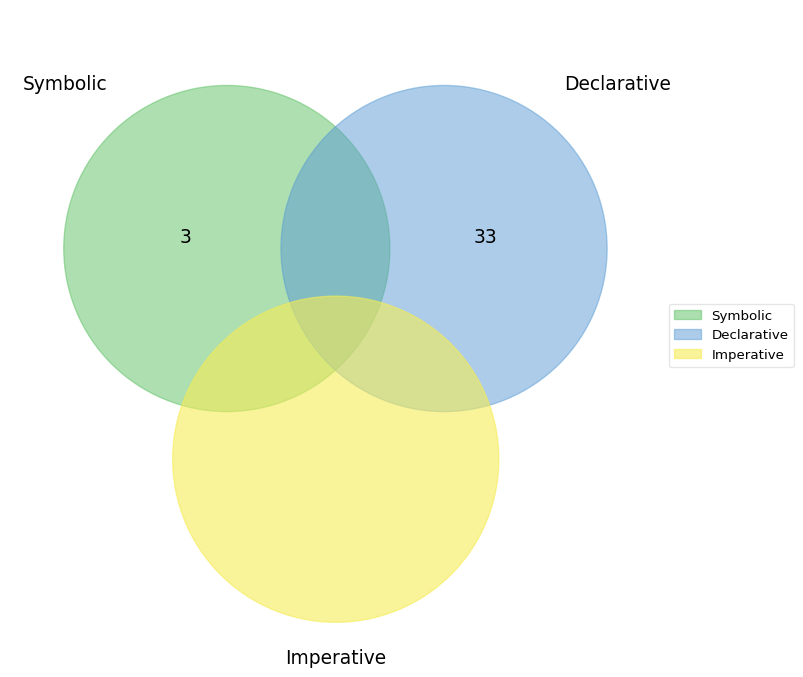

In [21]:
labels = create_labels_names_languages_by_paradigm(languages, lambda s:language_kind(s)=='Specification')
names=['Symbolic','Declarative','Imperative']
print(labels)
create_venn3(labels, names)

12.Report the number of languages by context (academia or industry). Data are stacked by kind of language (specification or implementation).

         kind of language  number of languages
Academia   Implementation                   30
Industry   Implementation                   35
Academia    Specification                   30
Industry    Specification                    6


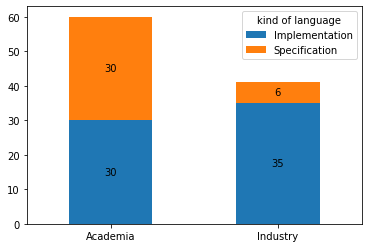

In [23]:
df=create_dataframe_languages_by_context_and_kind(languages)
print(df)
create_stacked_bar(df,'kind of language','number of languages')

   

13. Report the number of smart contract languages, classified by blockchain platform.

               number of languages
Ethereum                        23
Agnostic                        22
Bitcoin                          7
Hyperledger                      6
Tezos                            5
Qtum                             1
Kadena                           1
Digital Asset                    1
Zen Protocol                     1
Cardano                          1
RChain                           1
aeternity                        1
IELE                             1
Neo                              1
Katal                            1
BOScoin                          1
Corda                            1
R3                               1
Waves                            1
Libra                            1
Chain                            1
Zilliqa                          1
Ekiden                           1
Tendermint                       1
Mystiko                          1


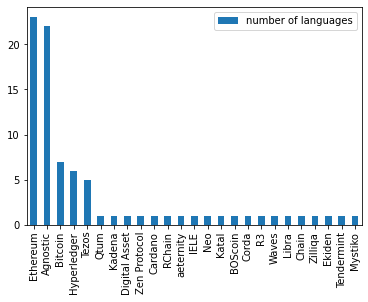

In [24]:
df = create_dataframe_languages_by_blokchain_platform(languages)
print(df)
create_bar(df)


14.Report the number of languages by kind of language (specification or implementation). Data are stacked by type of language (extension or stand-alone).

               type of language  number of languages
Implementation        Extension                   24
Implementation       Standalone                   41
Specification         Extension                   15
Specification        Standalone                   21


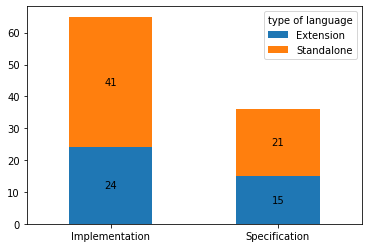

In [25]:
df=create_dataframe_languages_by_kind_and_type(languages)
print(df)
create_stacked_bar(df,'type of language','number of languages')


15.Report the number of languages by context (academia or industry). Data are stacked by type of language (extension or stand-alone).

         type of language  number of languages
Academia        Extension                   27
Industry       Standalone                   29
Academia       Standalone                   33
Industry        Extension                   12


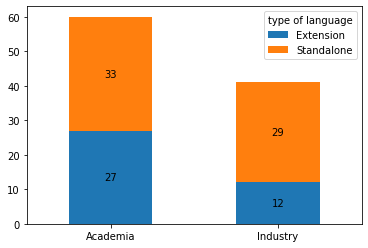

In [26]:
df=create_dataframe_languages_by_context_and_type(languages)
print(df)
create_stacked_bar(df,'type of language','number of languages')
    

16. Report the number of languages by focus.

            0
Focus        
BP          4
Financial  13
Formal      4
GP          4
Inter       7
Legal      10
MD          3
NL          4
Ontol       2
Optim       2
Oracles     2
Other       6
Privacy     9
SO          3
Safety      7
Secur      13
SoC         2
Trust       2
VM          2
Verif      21
VisSpec     3


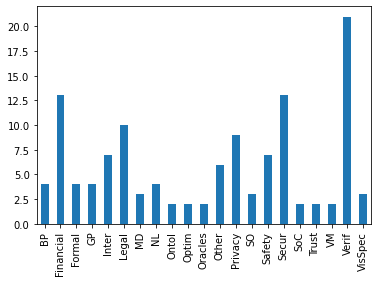

In [27]:
    df=create_dataframe_count_languages_by_focus(df_lang_feat)
    print(df)
    create_bar(df, legend=False)

17. Report the number of languages by study cases.

           number of use cases
Financial                   32
SharEco                     22
PubSec                      14
Game                        12
Notary                      12
Wallet                      10
IoT                          8
Others                       6
LegContr                     5
Library                      3
DataProv                     2
DSS                          1


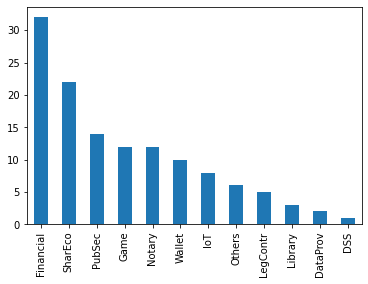

In [28]:
df = create_dataframe_use_cases_count(languages, df_uc)
print(df)
create_bar(df, legend=False)
    